<a href="https://colab.research.google.com/github/hardik-vala/unicorn-namegen/blob/main/unicorn_namegen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
!wget https://raw.githubusercontent.com/hardik-vala/unicorn-namegen/main/names.txt

--2024-04-07 23:21:09--  https://raw.githubusercontent.com/hardik-vala/unicorn-namegen/main/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8257 (8.1K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>]   8.06K  --.-KB/s    in 0s      

2024-04-07 23:21:09 (66.4 MB/s) - ‘names.txt’ saved [8257/8257]



In [3]:
names = open('names.txt', 'r').read().splitlines()

In [4]:
len(names)

854

In [5]:
names[:10]

['17Zuoye',
 '1Password',
 '23andMe',
 '36Kr Media',
 '58 Daojia',
 '5ire',
 '6sense',
 '9F',
 'Acko',
 'Acorns']

In [6]:
min(len(w) for w in names)

2

In [7]:
max(len(w) for w in names)

34

In [8]:
b = {}
for w in names:
  chs = ["<S>"] + list(w) + ["<E>"]
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [9]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('e', '<E>'), 119),
 (('s', '<E>'), 89),
 (('a', 'n'), 85),
 (('<S>', 'S'), 77),
 (('i', 'n'), 74),
 (('a', 'r'), 72),
 (('e', 'r'), 72),
 (('r', 'e'), 64),
 (('<S>', 'C'), 63),
 (('o', 'n'), 62),
 (('<S>', 'A'), 60),
 (('y', '<E>'), 59),
 (('o', '<E>'), 58),
 (('a', 'l'), 57),
 (('<S>', 'M'), 57),
 (('o', 'r'), 56),
 (('e', 'n'), 56),
 (('i', 't'), 56),
 (('t', '<E>'), 54),
 (('n', '<E>'), 52),
 (('r', 'a'), 52),
 (('a', '<E>'), 51),
 (('o', 'u'), 51),
 (('r', 'o'), 50),
 (('l', 'i'), 49),
 (('i', 'c'), 48),
 (('l', 'o'), 46),
 (('t', 'i'), 45),
 (('n', 't'), 45),
 (('<S>', 'B'), 45),
 (('<S>', 'D'), 45),
 (('<S>', 'P'), 45),
 (('r', '<E>'), 44),
 (('<S>', 'T'), 43),
 (('n', 'g'), 42),
 (('l', 'a'), 41),
 (('r', 'i'), 40),
 (('o', 'l'), 39),
 (('<S>', 'G'), 39),
 (('t', 'e'), 38),
 (('o', 'm'), 38),
 (('t', 'a'), 37),
 (('e', 't'), 37),
 (('m', '<E>'), 36),
 (('n', 'd'), 35),
 (('i', 'a'), 35),
 (('a', 't'), 35),
 (('e', 'c'), 35),
 (('e', 's'), 34),
 (('c', 'h'), 33),
 (('<S>', 'F'

In [10]:
chars = sorted(list(set(''.join(names))))
stoi = { s: i + 1 for i,s in enumerate(chars) }
stoi["!"] = 0
itos = { i: s for s, i in stoi.items() }

In [11]:
N = torch.zeros((len(stoi), len(stoi)), dtype=torch.int32)

In [12]:
for n in names:
  chs = ["!"] + list(n) + ["!"]
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

(-0.5, 73.5, 73.5, -0.5)

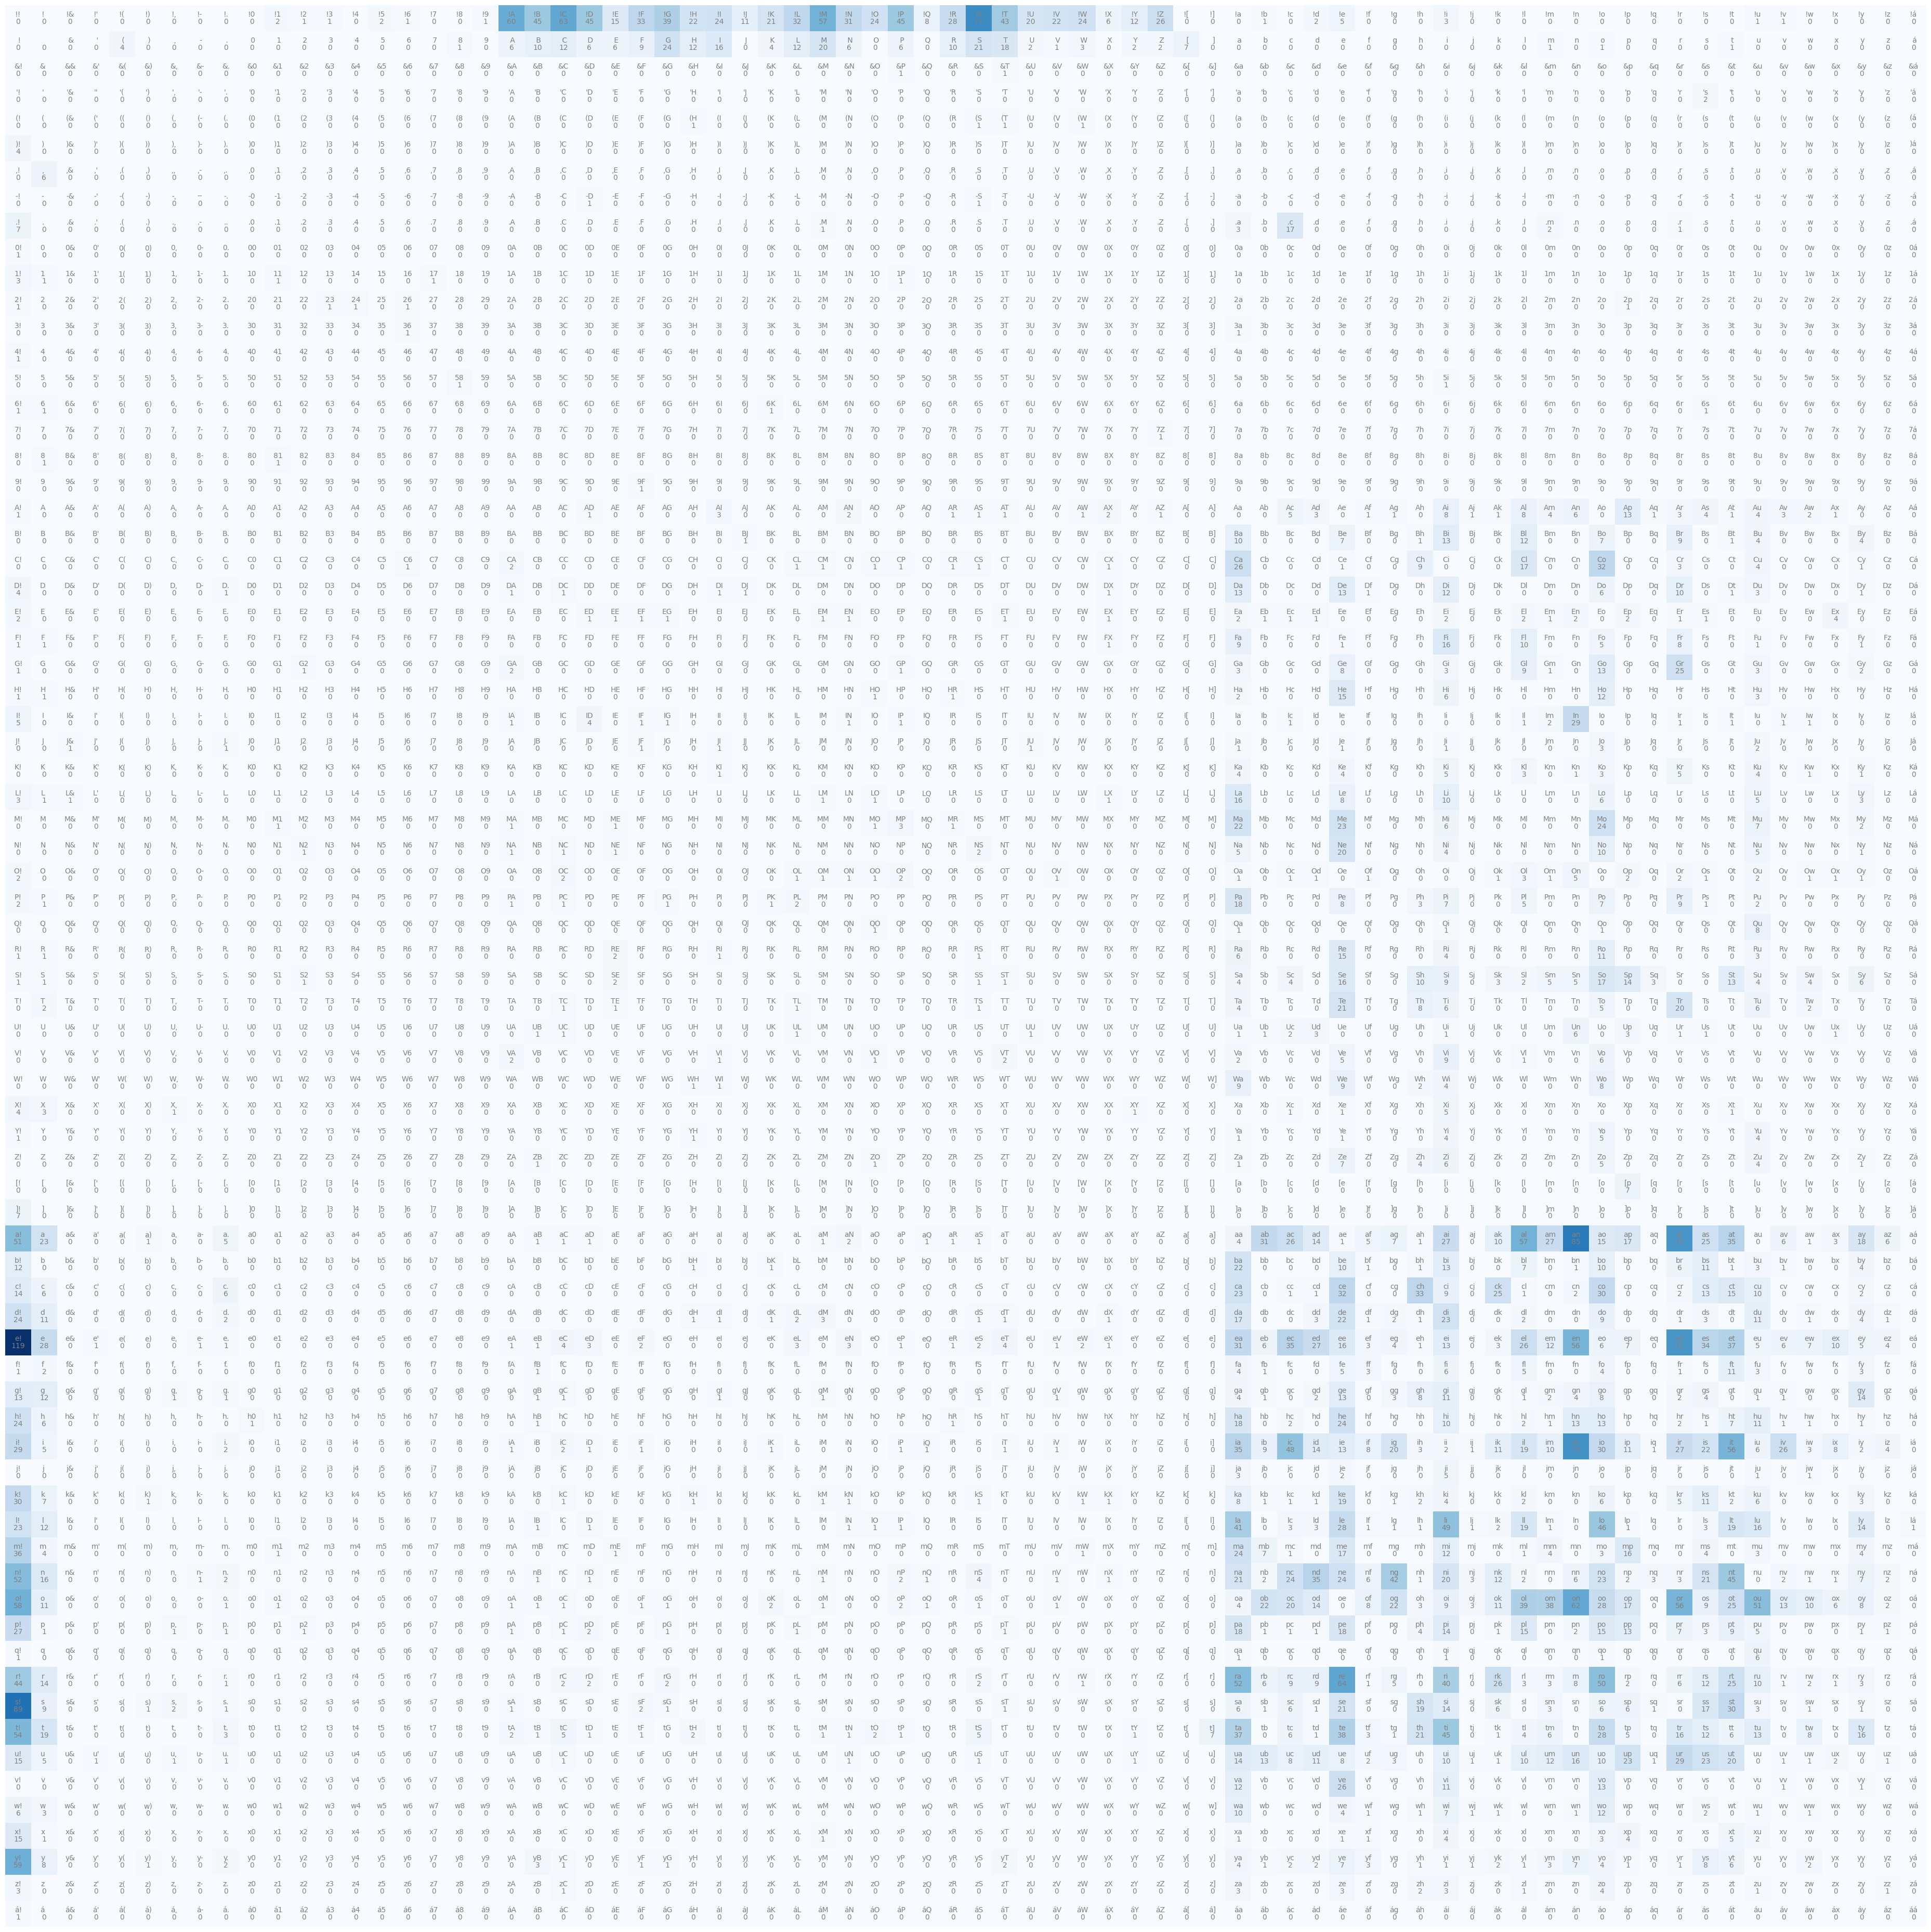

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(48,48))
plt.imshow(N, cmap='Blues')
for i in range(len(stoi)):
  for j in range(len(stoi)):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
    plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [14]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0023, 0.0012, 0.0012, 0.0000, 0.0023, 0.0012, 0.0000, 0.0000,
        0.0012, 0.0703, 0.0527, 0.0738, 0.0527, 0.0176, 0.0386, 0.0457, 0.0258,
        0.0281, 0.0129, 0.0246, 0.0375, 0.0667, 0.0363, 0.0281, 0.0527, 0.0094,
        0.0328, 0.0902, 0.0504, 0.0234, 0.0258, 0.0281, 0.0070, 0.0141, 0.0304,
        0.0000, 0.0000, 0.0000, 0.0012, 0.0000, 0.0023, 0.0059, 0.0000, 0.0000,
        0.0000, 0.0035, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0012, 0.0012, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])

In [15]:
g = torch.Generator().manual_seed(21474883647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'C'

In [16]:
P = (N + 1).float()
P /= P.sum(1, keepdim=True)

In [17]:
g = torch.Generator().manual_seed(21474883647)

for i in range(5):
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break

  print(''.join(out))

CSedeFKIEfs!
JbW0QjYhe!
GetCaorouevagXJu [po T[In7wonmar5[wxzJ,[honqc pz-BybQFr,!
WGo!
J9G8La!


In [18]:
log_likelihood = 0.0
denom = 0
for n in names:
  chs = ["!"] + list(n) + ["!"]
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    denom += 1
    # print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")

print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/denom}")

log_likelihood=tensor(-24197.8945)
nll=tensor(24197.8945)
2.9309465885162354


In [19]:
# create the training set of bigrams (xs, ys)
xs, ys = [], []

for n in names:
  chs = ["!"] + list(n) + ["!"]
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [20]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=len(stoi)).float() # one-hot encoding
W = torch.randn((len(stoi), len(stoi)))
logits = xenc @ W # predict log-counts
counts = logits.exp() #equivalent-N
probs = counts / counts.sum(1, keepdims=True) # probabilities of next character
# The last 2 lines are together called a 'softmax'

In [21]:
probs.shape

torch.Size([8256, 74])

In [22]:
nlls = torch.zeros(len(xs))
for i in range(len(xs)):
  # i-th bigram:
  x = xs[i].item()
  y = ys[i].item()
  p = probs[i, y]
  logp = torch.log(p)
  nll = -logp
  nlls[i] = nll

print('average negative log likelihood, i.e. loss =', nlls.mean().item())

average negative log likelihood, i.e. loss = 4.7646379470825195


In [23]:
# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((len(stoi), len(stoi)), generator=g, requires_grad=True)

In [24]:
# gradient descent
for k in range(100):
  xenc = F.one_hot(xs, num_classes=len(stoi)).float() # input to the network: one-hot encoding
  logits = xenc @ W # predit log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilties for next character
  loss = -probs[torch.arange(len(xs)), ys].log().mean() + 0.01 * (W**2).mean()
  print(loss.item())

  # backward pass
  W.grad = None # set gradient to zero
  loss.backward()

  W.data += -50 * W.grad

4.782886505126953
4.5994110107421875
4.441869735717773
4.303969860076904
4.182790756225586
4.075746059417725
3.980872392654419
3.8968751430511475
3.8227343559265137
3.757431745529175
3.6998634338378906
3.6488709449768066
3.603347063064575
3.562343120574951
3.5251171588897705
3.4911017417907715
3.4598610401153564
3.4310479164123535
3.4043781757354736
3.379613161087036
3.3565526008605957
3.3350253105163574
3.3148860931396484
3.2960095405578613
3.278284788131714
3.261618137359619
3.2459237575531006
3.2311244010925293
3.2171521186828613
3.203944206237793
3.1914429664611816
3.1795966625213623
3.1683568954467773
3.157679319381714
3.147523880004883
3.1378531455993652
3.128632068634033
3.119830369949341
3.1114184856414795
3.103369951248169
3.09566068649292
3.088268280029297
3.081171989440918
3.0743541717529297
3.067796468734741
3.0614826679229736
3.0553994178771973
3.049532413482666
3.043869972229004
3.038400173187256
3.0331130027770996
3.027998685836792
3.023047924041748
3.0182533264160156
3.

In [25]:
# sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=len(stoi)).float()
    logits = xenc @ W
    counts = logits.exp()
    p = counts / counts.sum(1, keepdims=True)

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

NJJ1(c!
Sopewal!
Chz, Gr MLYNPetts!
BigetSm!
PactWdianen!
Glturino QQ(&mppa9E04LjiAscoroll!
KuSNeanDiCaben,6laroioutaNAstiker Ho!
V6le!
Ga)QNetoutf In!
any!


In [26]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in names:
  # print(w)
  context = [0] * block_size
  for ch in w + '!':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [27]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([8256, 3]), torch.int64, torch.Size([8256]), torch.int64)

In [28]:
vocab_size = len(stoi)
n_embd = 2
n_hidden = 100

In [29]:
# build the dataset

def build_dataset(names):
  block_size = 3 # context length: how many characters do we take to predict the next one?
  X, Y = [], []
  for w in names:
    # print(w)
    context = [0] * block_size
    for ch in w + '!':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      # print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(names)
n1 = int(0.8*len(names))
n2 = int(0.9*len(names))

Xtr, Ytr = build_dataset(names[:n1])
Xdev, Ydev = build_dataset(names[n1:n2])
Xte, Yte = build_dataset(names[n2:])

torch.Size([6633, 3]) torch.Size([6633])
torch.Size([829, 3]) torch.Size([829])
torch.Size([794, 3]) torch.Size([794])


In [30]:
C = torch.randn((vocab_size, n_embd))
C.shape

torch.Size([74, 2])

In [31]:
emb = C[X]
emb.shape

torch.Size([8256, 3, 2])

In [32]:
W1 = torch.rand(((n_embd * block_size), n_hidden)) * (5/3) / ((n_embd * block_size)**0.5)
# b1 = torch.rand(n_hidden) * 0.01

In [33]:
torch.cat((emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]), 1).shape

torch.Size([8256, 6])

In [34]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([8256, 6])

In [35]:
emb.view(-1, 6).shape

torch.Size([8256, 6])

In [36]:
# h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
# h.shape

In [37]:
W2 = torch.rand(n_hidden, vocab_size) * 0.01
b2 = torch.rand(vocab_size) * 0

In [38]:
bngain = torch.ones((1, n_hidden))
bnbias = torch.zeros((1, n_hidden))
bnmean_running = torch.zeros((1, n_hidden))
bnstd_running = torch.ones((1, n_hidden))

In [39]:
parameters = [C, W1, b2, W2, b2, bngain, bnbias]

In [40]:
for p in parameters:
  p.requires_grad = True

In [41]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [42]:
max_steps = 100000

lri = []
lossi = []
stepi = []

for i in range(max_steps):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # embed the characters into vectors
  embcat = emb.view(emb.shape[0], -1) # concatenate vectors
  hpreact = embcat @ W1 # hidden layer pre-activation
  bnmeani = hpreact.mean(0, keepdim=True)
  bnstdi = hpreact.std(0, keepdim=True)
  hpreact = bngain * ((hpreact - bnmeani) / bnstdi) + bnbias

  with torch.no_grad():
    bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
    bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi

  h = torch.tanh(hpreact) # hidden layer
  logits = h @ W2 + b2 # output layer
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1 if i < 50000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  # stepi.append(i)
  # lri.append(lre[i])
  # lossi.append(loss.item())

  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())
# print(loss.item())

      0/ 100000: 4.2999
  10000/ 100000: 2.7556
  20000/ 100000: 2.8263
  30000/ 100000: 2.9067
  40000/ 100000: 2.6021
  50000/ 100000: 2.4785
  60000/ 100000: 2.5357
  70000/ 100000: 2.3855
  80000/ 100000: 2.4393
  90000/ 100000: 2.3532


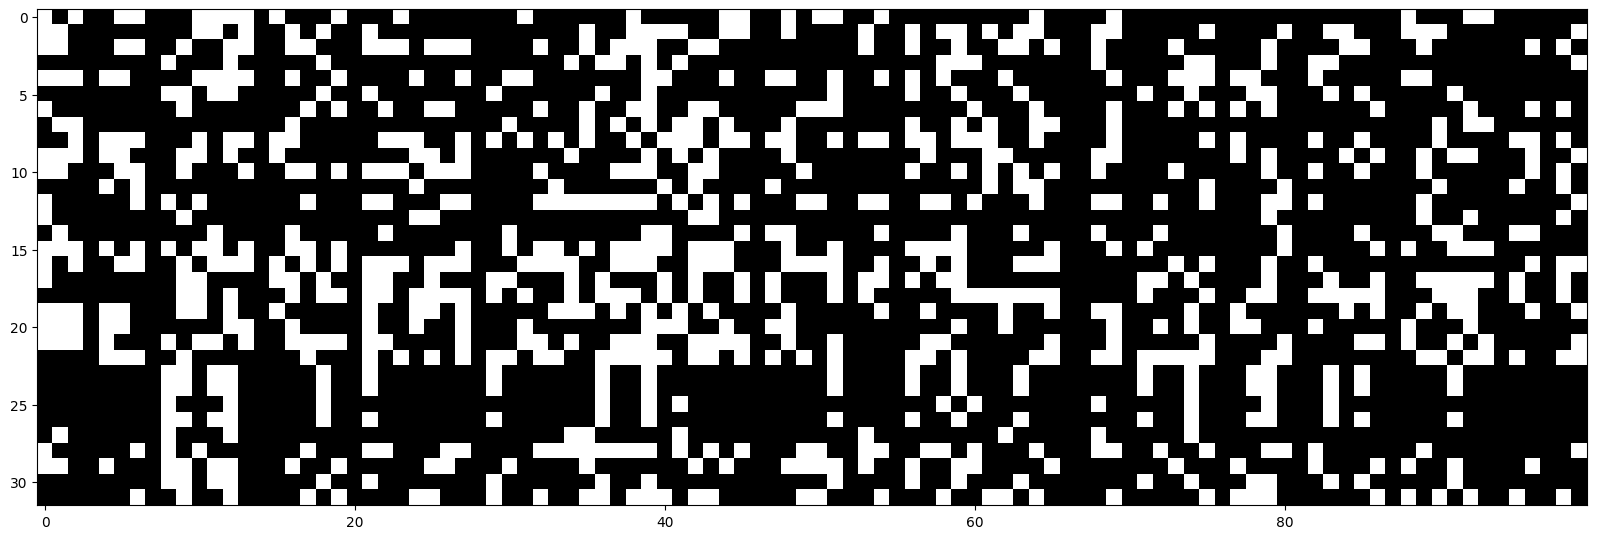

In [43]:
plt.figure(figsize=(20, 10))
plt.imshow(h.abs() > 0.99, cmap="gray", interpolation="nearest");

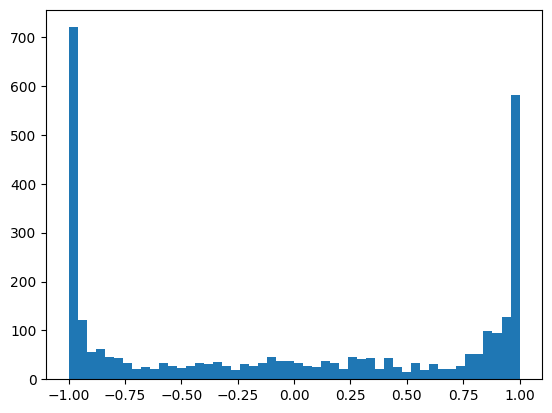

In [44]:
plt.hist(h.view(-1).tolist(), 50);

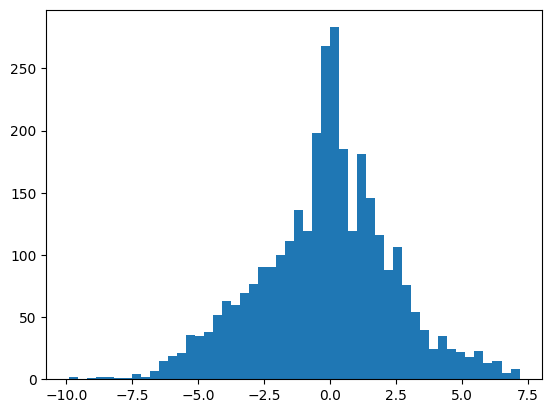

In [45]:
plt.hist(hpreact.view(-1).tolist(), 50);

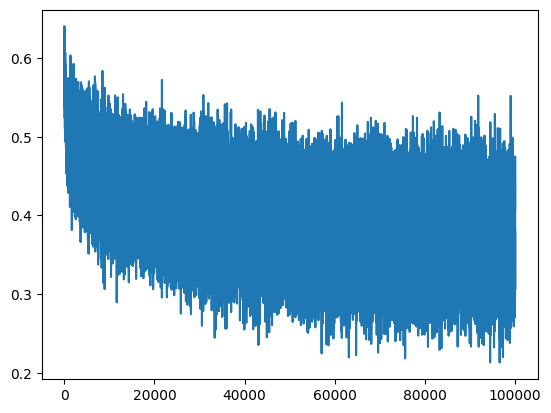

In [46]:
plt.plot(lossi)

In [47]:
# plt.plot(lri, lossi)

In [48]:
# calibrate the batch norm at the end of training

with torch.no_grad():
  # pass the training set through
  emb = C[Xtr]
  embcat = emb.view(emb.shape[0], -1)
  hpreact = embcat @ W1 # + b1
  # measure the mean/std over the entire training set
  bnmean = hpreact.mean(0, keepdim=True)
  bnstd = hpreact.std(0, keepdim=True)

In [49]:
@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  emb = C[x] # (N, block_size, n_embd)
  embcat = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
  hpreact = embcat @ W1 # hidden layer pre-activation
  hpreact = bngain * (hpreact - bnmean_running) / bnstd_running + bnbias
  h = torch.tanh(hpreact) # (N, n_hidden)
  logits = h @ W2 + b2 # (N, vocab_size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss("train")
split_loss("val")

train 2.2670085430145264
val 3.048577308654785


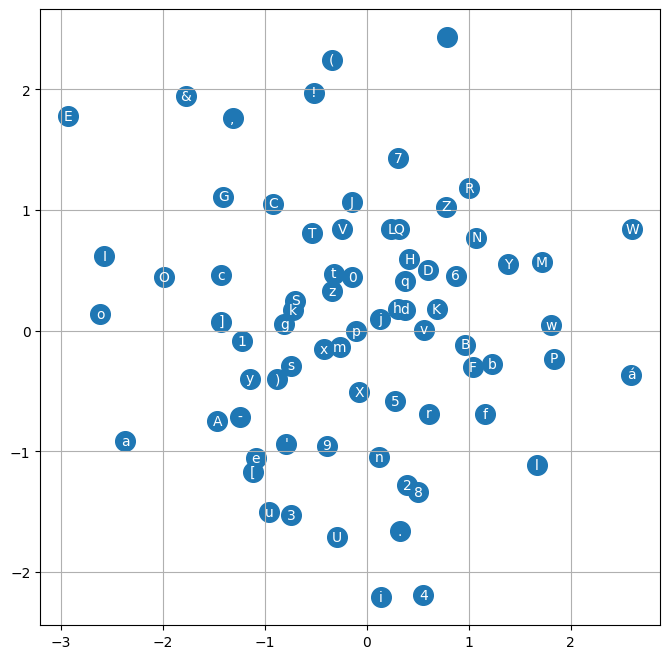

In [50]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

In [51]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
  out = []
  context = [0] * block_size # initialize all with !!!
  while True:
    emb = C[torch.tensor([context])]
    embcat = emb.view(emb.shape[0], -1)
    hpreact = embcat @ W1
    hpreact = bngain * (hpreact - bnmean_running) / bnstd_running + bnbias
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break

  print(''.join(itos[i] for i in out))

Oletiencys!
Apperd!
CiniaanceDitworS!
Ded!
Krigbs!
Bondrairang Caliyyhur Fackripe!
DikBli!
5iA (Noupe Habame!
Welinesrendia!
CustCaineD([!
Tompsa!
Ins!
Careol Nelitedso!
Onjuand]!
Sowsertarthly!
Ceunt!
ll6obon!
Iwj!
Qyceir!
Clunfeschuo!


In [52]:
# utility function we will use later when comparing manual gradients to PyTorch gradients
def cmp(s, dt, t):
  ex = torch.all(dt == t.grad).item()
  app = torch.allclose(dt, t.grad)
  maxdiff = (dt - t.grad).abs().max().item()
  print(f'{s:15s} | exact: {str(ex):5s} | approximate: {str(app):5s} | maxdiff: {maxdiff}')

In [53]:
n_embd = 3 # the dimensionality of the character embedding vectors
n_hidden = 64 # the number of neurons in the hidden layer of the MLP

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C  = torch.randn((vocab_size, n_embd),            generator=g)
# Layer 1
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * (5/3)/((n_embd * block_size)**0.5)
b1 = torch.randn(n_hidden,                        generator=g) * 0.1 # using b1 just for fun, it's useless because of BN
# Layer 2
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.1
b2 = torch.randn(vocab_size,                      generator=g) * 0.1
# BatchNorm parameters
bngain = torch.randn((1, n_hidden))*0.1 + 1.0
bnbias = torch.randn((1, n_hidden))*0.1

# Note: I am initializating many of these parameters in non-standard ways
# because sometimes initializating with e.g. all zeros could mask an incorrect
# implementation of the backward pass.

parameters = [C, W1, b1, W2, b2, bngain, bnbias]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

5800


In [54]:
batch_size = 32
n = batch_size # a shorter variable also, for convenience
# construct a minibatch
ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

In [55]:
# forward pass, "chunkated" into smaller steps that are possible to backward one at a time

emb = C[Xb] # embed the characters into vectors
embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
# Linear layer 1
hprebn = embcat @ W1 + b1 # hidden layer pre-activation
# BatchNorm layer
bnmeani = 1/n*hprebn.sum(0, keepdim=True)
bndiff = hprebn - bnmeani
bndiff2 = bndiff**2
bnvar = 1/(n-1)*(bndiff2).sum(0, keepdim=True) # note: Bessel's correction (dividing by n-1, not n)
bnvar_inv = (bnvar + 1e-5)**-0.5
bnraw = bndiff * bnvar_inv
hpreact = bngain * bnraw + bnbias
# Non-linearity
h = torch.tanh(hpreact) # hidden layer
# Linear layer 2
logits = h @ W2 + b2 # output layer
# cross entropy loss (same as F.cross_entropy(logits, Yb))
logit_maxes = logits.max(1, keepdim=True).values
norm_logits = logits - logit_maxes # subtract max for numerical stability
counts = norm_logits.exp()
counts_sum = counts.sum(1, keepdims=True)
counts_sum_inv = counts_sum**-1 # if I use (1.0 / counts_sum) instead then I can't get backprop to be bit exact...
probs = counts * counts_sum_inv
logprobs = probs.log()
loss = -logprobs[range(n), Yb].mean()

# PyTorch backward pass
for p in parameters:
  p.grad = None
for t in [logprobs, probs, counts, counts_sum, counts_sum_inv, # afaik there is no cleaner way
          norm_logits, logit_maxes, logits, h, hpreact, bnraw,
         bnvar_inv, bnvar, bndiff2, bndiff, hprebn, bnmeani,
         embcat, emb]:
  t.retain_grad()
loss.backward()
loss

tensor(4.2843, grad_fn=<NegBackward0>)

In [56]:
dlogprobs = torch.zeros_like(logprobs)
dlogprobs[range(n), Yb] = -1.0/n
dprobs = 1.0 / probs * dlogprobs
dcounts_sum_inv = (counts * dprobs).sum(1, keepdim=True)
dcounts_sum = (-counts_sum**-2) * dcounts_sum_inv
dcounts = dprobs * counts_sum_inv + torch.ones_like(counts) * dcounts_sum
dnorm_logits = counts * dcounts
dlogit_maxes = -dnorm_logits.sum(1, keepdim=True)
dlogits = dnorm_logits.clone() + F.one_hot(logits.max(1).indices, num_classes=logits.shape[1]) * dlogit_maxes
dh = dlogits @ W2.T
dW2 = h.T @ dlogits
db2 = dlogits.sum(0)
dhpreact = (1.0 - h**2) * dh
dbngain = (bnraw * dhpreact).sum(0, keepdim=True)
dbnraw = bngain * dhpreact
dbnbias = dhpreact.sum(0, keepdim=True)
dbnvar_inv = (bndiff * dbnraw).sum(0, keepdim=True)
dbnvar = -0.5 * (bnvar + 1e-5)**-1.5 * dbnvar_inv
dbndiff2 = (1.0 / (n - 1)) * torch.ones_like(bndiff2) * dbnvar
dbndiff = bnvar_inv * dbnraw + 2 * bndiff * dbndiff2
dbnmeani = (-dbndiff).sum(0, keepdim=True)
dhprebn = dbndiff.clone() + torch.ones_like(hprebn) * 1.0/n * dbnmeani
dembcat = dhprebn @ W1.T
dW1 = embcat.T @ dhprebn
db1 = dhprebn.sum(0)
demb = dembcat.view(emb.shape)
dC = torch.zeros_like(C)
for k in range(Xb.shape[0]):
  for j in range(Xb.shape[1]):
    ix = Xb[k, j]
    dC[ix] += demb[k, j]

cmp("logprobs", dlogprobs, logprobs)
cmp("probs", dprobs, probs)
cmp("counts_sum_inv", dcounts_sum_inv, counts_sum_inv)
cmp("counts_sum", dcounts_sum, counts_sum)
cmp("counts", dcounts, counts)
cmp("norm_logits", dnorm_logits, norm_logits)
cmp("logit_maxes", dlogit_maxes, logit_maxes)
cmp("logits", dlogits, logits)
cmp("h", dh, h)
cmp("W2", dW2, W2)
cmp("b2", db2, b2)
cmp("hpreact", dhpreact, hpreact)
cmp("bngain", dbngain, bngain)
cmp("bnraw", dbnraw, bnraw)
cmp("bnbias", dbnbias, bnbias)
cmp("bndiff", dbndiff, bndiff)
cmp("bnvar_inv", dbnvar_inv, bnvar_inv)
cmp("bnvar", dbnvar, bnvar)
cmp("bndiff2", dbndiff2, bndiff2)
cmp("hprebn", dhprebn, hprebn)
cmp("bnmeani", dbnmeani, bnmeani)
cmp("embcat", dembcat, embcat)
cmp("W1", dW1, W1)
cmp("b1", db1, b1)
cmp("emb", demb, emb)
cmp("C", dC, C)

logprobs        | exact: True  | approximate: True  | maxdiff: 0.0
probs           | exact: True  | approximate: True  | maxdiff: 0.0
counts_sum_inv  | exact: True  | approximate: True  | maxdiff: 0.0
counts_sum      | exact: True  | approximate: True  | maxdiff: 0.0
counts          | exact: True  | approximate: True  | maxdiff: 0.0
norm_logits     | exact: True  | approximate: True  | maxdiff: 0.0
logit_maxes     | exact: True  | approximate: True  | maxdiff: 0.0
logits          | exact: True  | approximate: True  | maxdiff: 0.0
h               | exact: True  | approximate: True  | maxdiff: 0.0
W2              | exact: True  | approximate: True  | maxdiff: 0.0
b2              | exact: True  | approximate: True  | maxdiff: 0.0
hpreact         | exact: False | approximate: True  | maxdiff: 4.656612873077393e-10
bngain          | exact: False | approximate: True  | maxdiff: 1.862645149230957e-09
bnraw           | exact: False | approximate: True  | maxdiff: 9.313225746154785e-10
bnbias  

In [57]:
# build the dataset

block_size = 8 # context length: how many characters do we take to predict the next one?

def build_dataset(names):
  X, Y = [], []
  for w in names:
    # print(w)
    context = [0] * block_size
    for ch in w + '!':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      # print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(names)
n1 = int(0.8*len(names))
n2 = int(0.9*len(names))

Xtr, Ytr = build_dataset(names[:n1])
Xdev, Ydev = build_dataset(names[n1:n2])
Xte, Yte = build_dataset(names[n2:])

torch.Size([6604, 8]) torch.Size([6604])
torch.Size([793, 8]) torch.Size([793])
torch.Size([859, 8]) torch.Size([859])


In [58]:
# -----------------------------------------------------------------------------------------------
class Linear:

  def __init__(self, fan_in, fan_out, bias=True):
    self.weight = torch.randn((fan_in, fan_out)) / fan_in**0.5 # note: kaiming init
    self.bias = torch.zeros(fan_out) if bias else None

  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out

  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])

# -----------------------------------------------------------------------------------------------
class BatchNorm1d:

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)

  def __call__(self, x):
    # calculate the forward pass
    if self.training:
      if x.ndim == 2:
        dim = 0
      elif x.ndim == 3:
        dim = (0,1)
      xmean = x.mean(dim, keepdim=True) # batch mean
      xvar = x.var(dim, keepdim=True) # batch variance
    else:
      xmean = self.running_mean
      xvar = self.running_var
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    # update the buffers
    if self.training:
      with torch.no_grad():
        self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
        self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

# -----------------------------------------------------------------------------------------------
class Tanh:
  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out
  def parameters(self):
    return []

# -----------------------------------------------------------------------------------------------
class Embedding:

  def __init__(self, num_embeddings, embedding_dim):
    self.weight = torch.randn((num_embeddings, embedding_dim))

  def __call__(self, IX):
    self.out = self.weight[IX]
    return self.out

  def parameters(self):
    return [self.weight]

# -----------------------------------------------------------------------------------------------
class Flatten:

  def __call__(self, x):
    self.out = x.view(x.shape[0], -1)
    return self.out

  def parameters(self):
    return []

# -----------------------------------------------------------------------------------------------
class FlattenConsecutive:

  def __init__(self, n):
    self.n = n

  def __call__(self, x):
    B, T, C = x.shape
    x = x.view(B, T//self.n, C*self.n)
    if x.shape[1] == 1:
      x = x.squeeze(1)
    self.out = x
    return self.out

  def parameters(self):
    return []

# -----------------------------------------------------------------------------------------------
class Sequential:

  def __init__(self, layers):
    self.layers = layers

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    self.out = x
    return self.out

  def parameters(self):
    # get parameters of all layers and stretch them out into one list
    return [p for layer in self.layers for p in layer.parameters()]

In [59]:
torch.manual_seed(42); # seed rng for reproducibility

In [60]:
n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 25 # the number of neurons in the hidden layer of the MLP

model = Sequential([
  Embedding(vocab_size, n_embd),
  FlattenConsecutive(2), Linear(n_embd * 2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  FlattenConsecutive(2), Linear(n_hidden * 2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  FlattenConsecutive(2), Linear(n_hidden * 2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(n_hidden, vocab_size),
])

# parameter init
with torch.no_grad():
  model.layers[-1].weight *= 0.1 # last layer make less confident

parameters = model.parameters()
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

5814


In [61]:
# same optimization as last time
max_steps = 100000
batch_size = 32
lossi = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,))
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  logits = model(Xb)
  loss = F.cross_entropy(logits, Yb) # loss function

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update: simple SGD
  lr = 0.1 if i < 150000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

      0/ 100000: 4.2979
  10000/ 100000: 2.2096
  20000/ 100000: 1.8617
  30000/ 100000: 2.1434
  40000/ 100000: 2.0622
  50000/ 100000: 1.8461
  60000/ 100000: 2.1375
  70000/ 100000: 1.9006
  80000/ 100000: 2.0959
  90000/ 100000: 1.4100


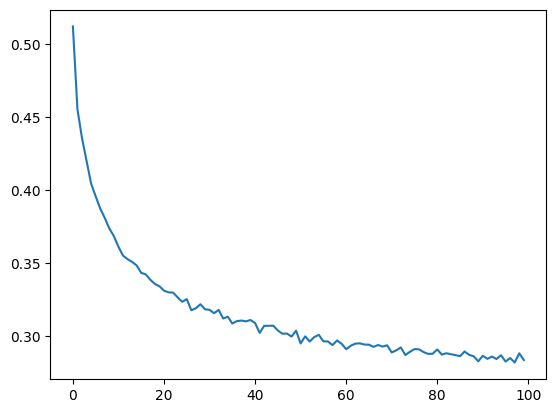

In [62]:
plt.plot(torch.tensor(lossi).view(-1, 1000).mean(1))

In [63]:
# put layers into eval mode (needed for batchnorm especially)
for layer in model.layers:
  layer.training = False

In [64]:
# evaluate the loss
@torch.no_grad() # this decorator disables gradient tracking inside pytorch
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  logits = model(x)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 1.7437520027160645
val 3.311878204345703


In [65]:
# sample from the model
for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      # forward pass the neural net
      logits = model(torch.tensor([context]))
      probs = F.softmax(logits, dim=1)
      # sample from the distribution
      ix = torch.multinomial(probs, num_samples=1).item()
      # shift the context window and track the samples
      context = context[1:] + [ix]
      out.append(ix)
      # if we sample the special '.' token, break
      if ix == 0:
        break

    print(''.join(itos[i] for i in out)) # decode and print the generated word

Alatemy Tuptiw!
SpaceX!
Bine Monopy!
Vruttic!
IretShop!
DiglrekCi!
Cunar!
Novlo Zous.Come!
Sifecbhe!
LeYpam!
IBctevar Mare!
Unisedab!
Pri!
Away!
Datady!
Sols Larbass!
Or.!
AploacI!
1SPop!
Sorksbfaxt!


In [66]:
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: "".join([itos[i] for i in l])

In [67]:
data = torch.tensor(encode("!".join(names)))

In [68]:
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

In [69]:
torch.manual_seed(1337)
batch_size = 4
block_size = 8 # context length

def get_batch(split):
  data = train_data if split == "train" else val_data
  ix = torch.randint(len(data) - block_size, (batch_size,))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  return x, y

xb, yb = get_batch("train")

In [75]:
import torch.nn as nn
from torch.nn import functional as F

n_embd = 32

class BigramLanguageModel(nn.Module):
  def __init__(self, vocab_size):
    super().__init__()
    self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
    self.position_embedding_table = nn.Embedding(block_size, n_embd)
    self.lm_head = nn.Linear(n_embd, vocab_size)

  def forward(self, idx, targets=None):
    B, T = idx.shape

    tok_emb = self.token_embedding_table(idx) # (B, T, C)
    pos_emb = self.position_embedding_table(torch.arange(T)) # (T, C)
    x = tok_emb + pos_emb # (B, T, C)
    logits = self.lm_head(x) # (B, T, vocab_size)
    if targets is None:
      loss = None
    else:
      B, T, C = logits.shape
      logits = logits.view(B*T, C)
      targets = targets.view(B*T)
      loss = F.cross_entropy(logits, targets)
    return logits, loss

  def generate(self, idx, max_new_tokens):
    for _ in range(max_new_tokens):
      logits, loss = self(idx)
      logits = logits[:, -1, :]
      probs = F.softmax(logits, dim=-1)
      idx_next = torch.multinomial(probs, num_samples=1)
      idx = torch.cat((idx, idx_next), dim=1)
    return idx

m = BigramLanguageModel(vocab_size)
out, loss = m(xb, yb)
print(out.shape)
print(loss)

torch.Size([256, 74])
tensor(4.5002, grad_fn=<NllLossBackward0>)


In [76]:
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [77]:
device = "cuda" if torch.cuda.is_available() else "cpu"
eval_iters = 200
eval_interval = 2000

# helps estimate an arbitrarily accurate loss over either split using many batches
@torch.no_grad()
def estimate_loss(model):
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [78]:
batch_size = 32
for step in range(10000):
  if step % eval_interval == 0:
    losses = estimate_loss(m)
    print(f"step {step}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
  xb, yb = get_batch("train")
  logits, loss = m(xb, yb)
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()

print(loss.item())

step 0: train loss 4.4952, val loss 4.4867
step 2000: train loss 2.7541, val loss 2.9117
step 4000: train loss 2.7144, val loss 2.9292
step 6000: train loss 2.7017, val loss 2.9347
step 8000: train loss 2.6973, val loss 2.9592
2.6238248348236084


In [74]:
idx = torch.zeros((1, 1), dtype=torch.long)
print(decode(m.generate(idx, max_new_tokens=100)[0].tolist()))

!Inj&a!Ne!Finte!Irgaro!Narghtiag!Xcolom!ReatitiDifin.!Prger HedLyTw!LiKinerickenisivei Inche!Cal!Gla!
